# Projeto Final

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
from sklearn.model_selection import train_test_split


In [4]:
# url ='dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'

In [5]:

dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head(25)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


## Analíse Exploratoria 

In [6]:
dados.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

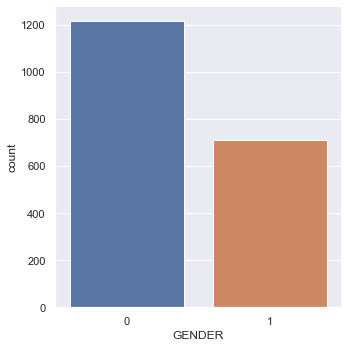

In [7]:
sns.catplot(data=dados, x='GENDER', kind="count")



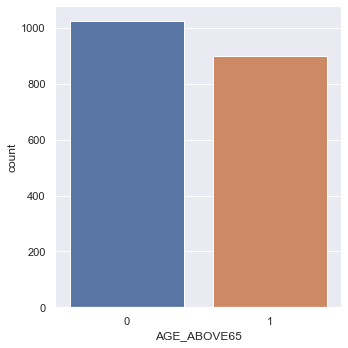

In [8]:
sns.catplot(data=dados, x='AGE_ABOVE65', kind='count')


Pórem pode se notar que o fato de haver cinco linhas(fazendo com que 384 pacienntes virem 1924) pra serem contadas no graficos criados, ele se tornam invalidos.
Será preciso deixar cada paciente com uma linha para poder voltar as analises iniciais.
E tambem so sera contabilizado nos graficos pacientes que testaram positivos, para isso sera usada a janela 'ABOVE_12' pois contem 1 se o paciente foi em qualquer momento diagnosticado.

In [9]:
# df_janela_unica = dados.loc[dados['WINDOW'] < '2-4']
# df_janela_unica

df_janela_unica = dados.loc[(dados['WINDOW'] == 'ABOVE_12') & (dados['ICU'] == 1)]


Agora os graficos seram refeitos mas com o seus devidos tamanhado, contabilizando um valor por pessoa

Text(0.5, 0, 'Disease Group')

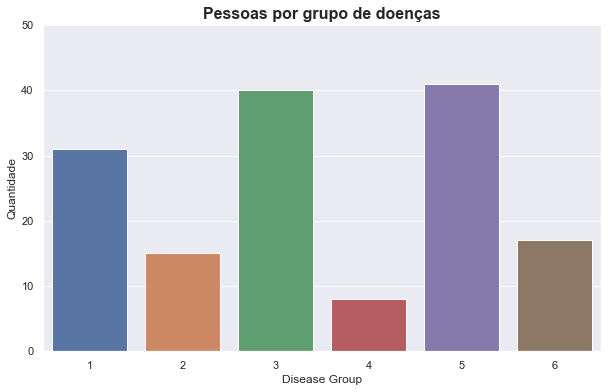

In [10]:

um = df_janela_unica ['DISEASE GROUPING 1'].sum()
dois =df_janela_unica ['DISEASE GROUPING 2'].sum()
tres =df_janela_unica ['DISEASE GROUPING 3'].sum()
quatro =df_janela_unica ['DISEASE GROUPING 4'].sum()
cinco =df_janela_unica ['DISEASE GROUPING 5'].sum()
seis =df_janela_unica ['DISEASE GROUPING 6'].sum()
lista_grupo = ['1','2','3','4','5','6']
lista_valores = [um, dois, tres, quatro, cinco, seis]

sns.barplot(x=lista_grupo, y=lista_valores)
plt.title('Pessoas por grupo de doenças',  fontweight="bold", fontsize=16)
plt.ylabel('Quantidade')
plt.ylim(0,50)
plt.xlabel('Disease Group')

Das pessoas que testaram positivo, estão mais presentes nos grupos 5 e 3.

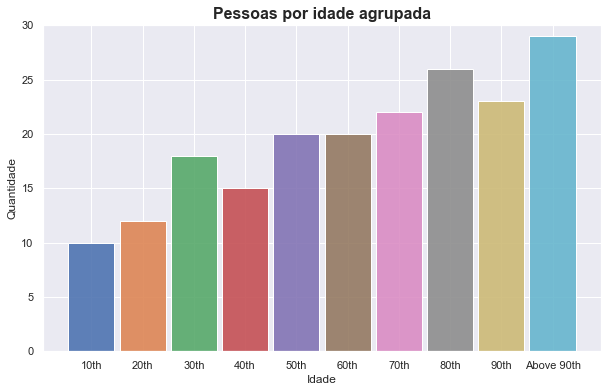

In [11]:

df_janela_unica_hist = df_janela_unica
df_janela_unica_hist['AGE_PERCENTIL'] = pd.Categorical(df_janela_unica_hist['AGE_PERCENTIL'],  ['10th','20th','30th','40th', '50th', '60th', '70th','80th', '90th', 'Above 90th'])

sns.histplot(data=df_janela_unica_hist, x="AGE_PERCENTIL", hue="AGE_PERCENTIL", shrink=.9, alpha=.89,legend=False)
plt.title('Pessoas por idade agrupada',  fontweight="bold", fontsize=16)
plt.ylabel('Quantidade')
plt.ylim(0,30)
plt.xlabel('Idade')

plt.show()

Como o esperado os grupos de idade se encontram em uma tendencia de crecimento.

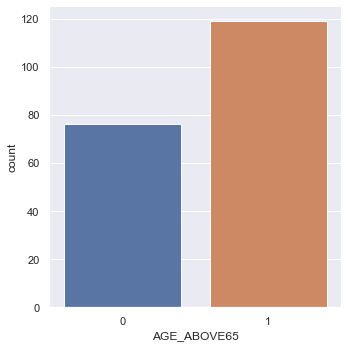

In [12]:
sns.catplot(data=df_janela_unica, x='AGE_ABOVE65', kind='count')


Se nota uma boa diferença em relação entre > 65 anos, mais uma vez como o esperado.

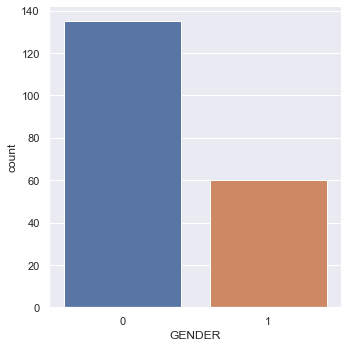

In [13]:
sns.catplot(data=df_janela_unica, x='GENDER', kind="count")


Se pode notar uma predominacia do genero 0, o qual por questões de privacidade não sabemos qual representa. sabe sim so ver antes de entregar.


Para seguir com a analise será usada a media das janelas 0-2 e 2-4 pois ""a soma das duas janelas pega quase 1/3 dos pacientes que foram internados. Sendo 32 pacientes da primeira janela e 27 da segunda.""
Para seguir com a manipulação eu irei seprar os dataframe comforme  os atributos das colunas

In [14]:
# df1 = dados['ICU'].loc[(dados['WINDOW'] == '0-2') & (dados['ICU'] == 1)].sum()
# df2 = dados['ICU'].loc[(dados['WINDOW'] == '2-4') & (dados['ICU'] == 1)].sum()
# df3 = dados['ICU'].loc[(dados['WINDOW'] == '4-6') & (dados['ICU'] == 1)].sum()
# df4 = dados['ICU'].loc[(dados['WINDOW'] == '6-12') & (dados['ICU'] == 1)].sum()
# df5 = dados['ICU'].loc[(dados['WINDOW'] == 'ABOVE_12') & (dados['ICU'] == 1)].sum()
# print('0-2:',32, '2-4:',27,'4-6:',40,  '6-12:',31, 'ABOVE_12:',65)

In [15]:
dados.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [16]:
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [17]:
def preenche_na(rows):
        rows.loc[rows["ICU"] != 1] = rows.loc[rows["ICU"] != 1].fillna(method='bfill').fillna(method='ffill')
        return rows

valor_cat = dados.iloc[:, :13]
valor_alvo = dados.iloc[:, -2:]
valor_num_colunms = dados.iloc[:,13:-2].columns
valor_num = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[list(valor_num_colunms) + ["ICU"]].apply(preenche_na)
# + ["ICU"]].apply(preenche_na)
# valor_num.drop("ICU", axis=1, inplace=True)
# 385 217
# valor_num
# 1925 13
# valor_cat
# 1925
# valor_alvo
valor_num_colunms
# xablau = pd.concat([valor_cat, valor_num, valor_alvo] )
# xablau

dados_finais = pd.concat([valor_cat, valor_num, valor_alvo], ignore_index=True, axis=1)
dados_finais

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,1,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,6-12,0


In [18]:
# dados.loc[dados["ICU"] != 1] =dados.loc[dados["ICU"] != 1].fillna(method='bfill').fillna(method='ffill')
# dados.tail(50)

def preenche_tabela(dados):
    def preenche_na(rows):
        rows.loc[rows["ICU"] != 1] = rows.loc[rows["ICU"] != 1].fillna(method='bfill').fillna(method='ffill')
        return rows
    
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[list(features_continuas_colunas) + ["ICU"]].apply(preenche_na)
    features_continuas.drop("ICU", axis=1, inplace=True)
    
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis=1)
    dados_finais.columns = dados.columns
    
    return dados_finais

In [19]:
preenche_tabela(dados)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [20]:
# daddd = preenche_tabela(dados)
# daddd.head(50)
df_janelass = dados.loc[dados['WINDOW'] <= '2-4']
df_janelass


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,382,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0
1915,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
1916,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0


In [21]:
# df_janelass = dados.loc[dados['WINDOW'] <= '2-4']
# def janal(dados):
#     valor_num_colunms = dados.iloc[:,13:-2].columns

#     valor_num = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).mean()[list(valor_num_colunms)]
#     valor_cat = dados.iloc[:, :13]
#     valor_alvo = dados.iloc[:, -2:]
#     dados_finais = pd.concat([valor_cat, valor_num, valor_alvo], ignore_index=True, axis=1)
#     dados_finais.columns = dados.columns
#     return dados_finais

In [22]:
# def preenche_tabela(dados):
#     # def preenche_na(rows):
#     #     rows.loc[rows["ICU"] != 1] = rows.loc[rows["ICU"] != 1].fillna(method='bfill').fillna(method='ffill')
#     #     return rows
    
#     features_continuas_colunas = dados.iloc[:, 13:-2].columns

#     features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[list(features_continuas_colunas) + ["ICU"]].apply(preenche_na)
#     features_continuas.drop("ICU", axis=1, inplace=True)
    
#     features_categoricas = dados.iloc[:, :13]
#     saida = dados.iloc[:, -2:]
    
#     dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis=1)
#     dados_finais.columns = dados.columns
    
#     return dados_finais

In [23]:
# df_janelas = dados.loc[dados['WINDOW'] <= '2-4']
# # df_janelas = df_janelas.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).mean()
# df_janelas.head(50)


In [24]:
# def prepare_window(rows):
#     if(np.any(rows["ICU"])):
#         rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
        
#     return rows.loc[rows["WINDOW"] == "0-2"]

# dados_limpos2 = dados.groupby("PATIENT_VISIT_IDENTIFIER").mean().apply(prepare_window)
# dala = dados_limpos2['ICU'].reset_index('PATIENT_VISIT_IDENTIFIER')
# dalas = dala['ICU']
# # dalas
# dados_limpos2


In [25]:

# df_janelas = dados.loc[dados['WINDOW'] <= '2-4']
# # df_janelas= df_janelas.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).mean().iloc[:,:-2]
# df_janelas


# def prepare_window(rows):
#     if(np.any(rows["ICU"])):
#         rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
        
#     return rows.loc[rows["WINDOW"] == "0-2"]

# dados_limpos2 = df_janelas.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
# dados_limpos2

In [26]:
# def janela(dados):
#     df_janelas = dados.loc[dados['WINDOW'] <= '2-4']
#     valor_cat = df_janelas.iloc[:, :13]
#     valor_alvo = df_janelas.iloc[:, -2:]
#     valor_num_colunms = df_janelas.iloc[:,13:-2]

#     # dados_finais = pd.concat([valor_cat, valor_num_colunms, valor_alvo], ignore_index=True, axis=1)
#     # dados_finais.columns = dados.columns
    
#     # return dados_finais
#     # return valor_num_colunms
    

In [27]:
dadad = janela(dados)
dadad

NameError: name 'janela' is not defined

links 
https://www.cnnbrasil.com.br/saude/homens-contraem-e-transmitem-mais-covid-19-do-que-as-mulheres-diz-estudo/